In [1]:
import pandas as pd 

# Load your Excel file 
file_path = "Class_Data_Set.xlsx"  # Excel file path
data = pd.read_excel(file_path)  # Changed from read_csv to read_excel
 
# Display the columns 
display(data.columns.tolist())

['Student Initials',
 'Age Range',
 'Online Activity Type',
 'Website ',
 'Date',
 'Auto-Calculated: Weekday - Do not enter data here',
 'Time Start',
 'Time End',
 'Auto-Calculated: Time on Activity - Do not enter data here',
 'Title of Movie, TV Show OR Name of Item being shopped for',
 'Was the media or item recommended by the site?',
 'Were you just browsing?',
 'Did you look/search for the specific media or item?',
 'Genre of media (drama, horror, suspense, comedy, etc) OR Type of item (beauty, clothing, electronic, homegoods, etc)',
 "Recommendation(s) Clicked: how many of the site's recommendations did you click through before making a selection or stopping activity?",
 'Unnamed: 15']

In [2]:
import pandas as pd

# Load the Excel file
file_path = "Class_Data_Set.xlsx"
try:
    # Use read_excel for Excel files
    data = pd.read_excel(file_path)

    # Optional: Strip whitespace from column names
    data.columns = data.columns.str.strip()

    # Display the columns in the dataset
    print("Column Names:", data.columns.tolist())

    # Additional basic information about the dataset
    print("\nDataset Information:")
    print("Number of rows:", len(data))
    print("Number of columns:", len(data.columns))

    # Quick overview of the data types
    print("\nColumn Data Types:")
    print(data.dtypes)

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.EmptyDataError:
    print(f"Error: No data in the file {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Column Names: ['Student Initials', 'Age Range', 'Online Activity Type', 'Website', 'Date', 'Auto-Calculated: Weekday - Do not enter data here', 'Time Start', 'Time End', 'Auto-Calculated: Time on Activity - Do not enter data here', 'Title of Movie, TV Show OR Name of Item being shopped for', 'Was the media or item recommended by the site?', 'Were you just browsing?', 'Did you look/search for the specific media or item?', 'Genre of media (drama, horror, suspense, comedy, etc) OR Type of item (beauty, clothing, electronic, homegoods, etc)', "Recommendation(s) Clicked: how many of the site's recommendations did you click through before making a selection or stopping activity?", 'Unnamed: 15']

Dataset Information:
Number of rows: 886
Number of columns: 16

Column Data Types:
Student Initials                                                                                                                            object
Age Range                                                             

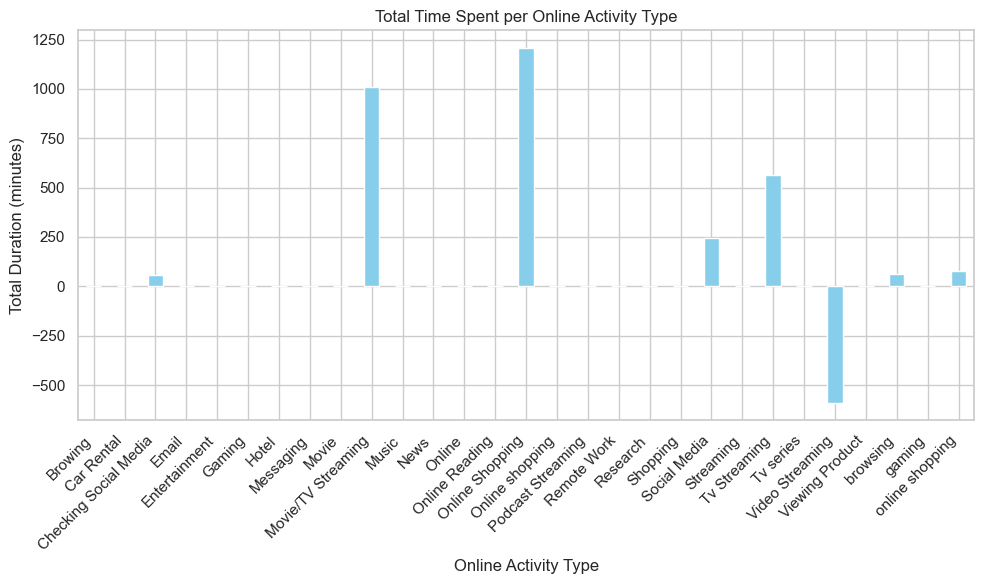

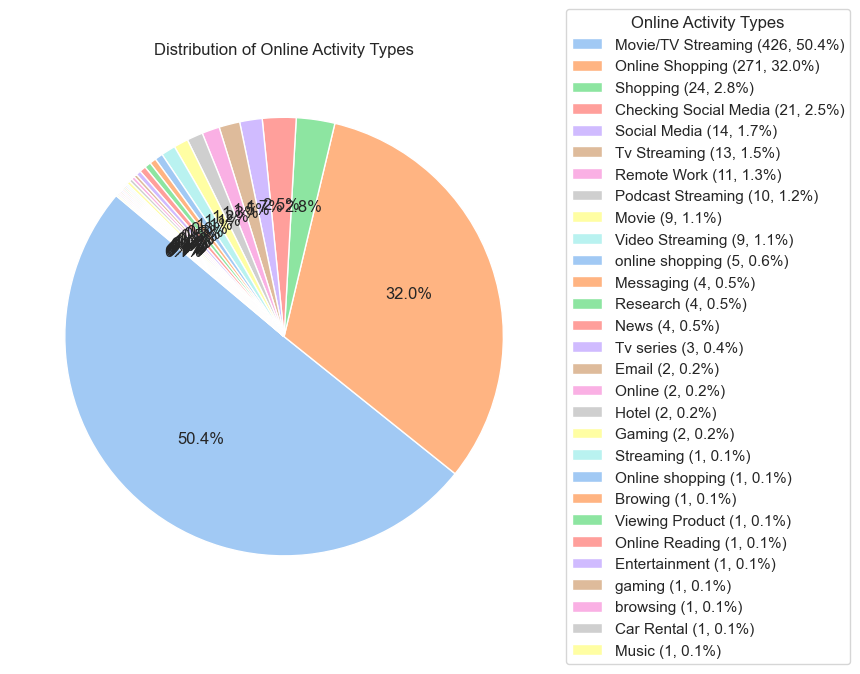

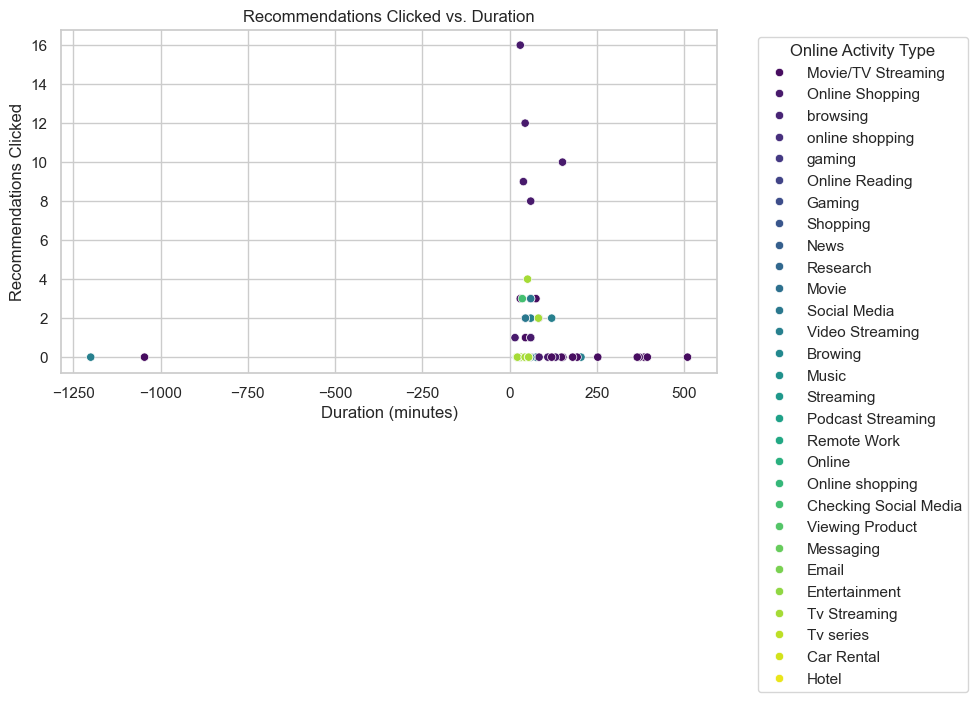

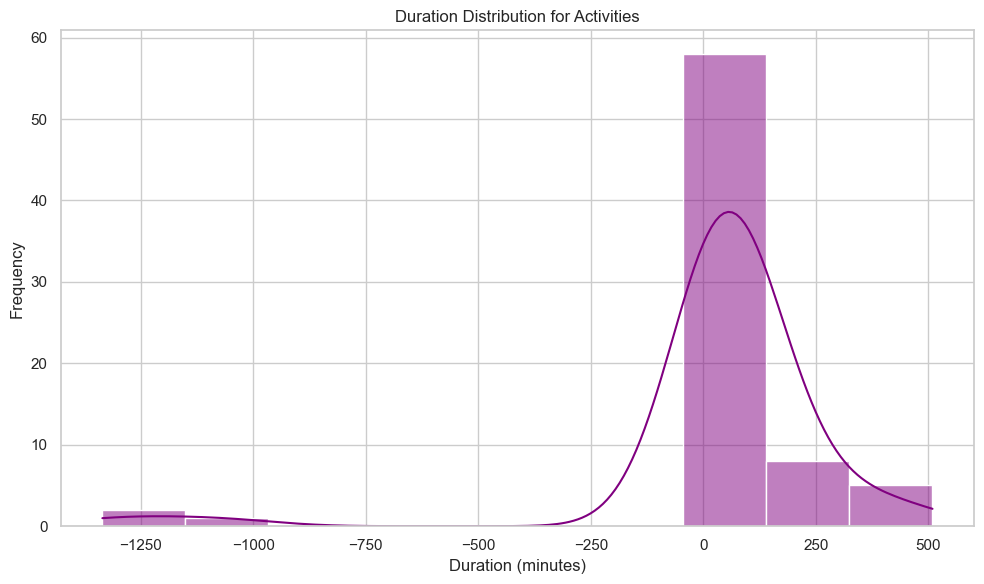

Summary of Cleaned Recommendations:
count    720.000000
mean       3.376389
std        7.634833
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max      100.000000
Name: Cleaned Recommendations, dtype: float64


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Excel file
file_path = "Class_Data_Set.xlsx"
data = pd.read_excel(file_path)

# Convert 'Time Start' and 'Time End' to datetime (if applicable)
if 'Time Start' in data.columns and 'Time End' in data.columns:
    data['Time Start'] = pd.to_datetime(data['Time Start'], errors='coerce')
    data['Time End'] = pd.to_datetime(data['Time End'], errors='coerce')

# Calculate Duration in minutes (if applicable)
if 'Time Start' in data.columns and 'Time End' in data.columns:
    data['Duration (minutes)'] = (data['Time End'] - data['Time Start']).dt.total_seconds() / 60

# Clean the Recommendations Clicked column (assuming the column name exists)
recommendations_column = "Recommendation(s) Clicked: how many of the site's recommendations did you click through before making a selection or stopping activity?"
if recommendations_column in data.columns:

    # Function to clean numeric values
    def clean_numeric(value):
        if isinstance(value, (int, float)):
            return value
        if isinstance(value, str):
            # Remove '+' and convert to numeric, return 0 if not possible
            try:
                return float(value.replace('+', ''))
            except:
                return 0
        return 0

    # Apply cleaning to the recommendations column
    data['Cleaned Recommendations'] = data[recommendations_column].apply(clean_numeric)

# Setting up the plot style
sns.set(style="whitegrid")

# Bar Chart: Total time spent per Online Activity Type
if 'Online Activity Type' in data.columns:
    activity_time = data.groupby('Online Activity Type')['Duration (minutes)'].sum()
    plt.figure(figsize=(10, 6))
    activity_time.plot(kind='bar', color='skyblue')
    plt.title('Total Time Spent per Online Activity Type')
    plt.ylabel('Total Duration (minutes)')
    plt.xlabel('Online Activity Type')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Online Activity Type' not found. Skipping bar chart generation.")

# Pie Chart: Distribution of Online Activity Types
if 'Online Activity Type' in data.columns:
    plt.figure(figsize=(12, 7))
    activity_counts = data['Online Activity Type'].value_counts()
    colors = sns.color_palette("pastel")

    # Create the pie chart without percentages
    wedges, _ = plt.pie(activity_counts, colors=colors, startangle=140)

    plt.title('Distribution of Online Activity Types')

    # Create a legend with counts and percentages
    labels = [f"{label} ({count:.0f}, {percent:.1f}%)" for label, count, percent in zip(activity_counts.index, activity_counts, activity_counts / activity_counts.sum() * 100)]
    plt.legend(labels, 
               title="Online Activity Types", 
               loc="center left", 
               bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()
else:
    print("Column 'Online Activity Type' not found. Skipping pie chart generation.")

# Scatter Plot: Recommendations clicked vs. duration (Ensuring column exists)
if 'Cleaned Recommendations' in data.columns and 'Online Activity Type' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=data, 
        x='Duration (minutes)', 
        y='Cleaned Recommendations', 
        hue='Online Activity Type', 
        palette='viridis'
    )
    plt.title('Recommendations Clicked vs. Duration')
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Recommendations Clicked')
    plt.legend(title='Online Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for scatter plot are missing.")

# Histogram: Duration distribution for activities (if applicable)
if 'Duration (minutes)' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Duration (minutes)'].dropna(), bins=10, kde=True, color='purple')
    plt.title('Duration Distribution for Activities')
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Optional: Print out some summary statistics
if 'Cleaned Recommendations' in data.columns:
    print("Summary of Cleaned Recommendations:")
    print(data['Cleaned Recommendations'].describe())